In [1]:
from PIL import Image

import albumentations as A
import torchvision.transforms as T

import numpy as np
from utils import RandomPaste
from data.dataset import SyntheticDataset

from pathlib import Path

from joblib import Parallel, delayed


/home/laurent_fainsin/Documents/unet/.venv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
transform = A.Compose(
    [
        A.LongestMaxSize(max_size=1024),
        A.Flip(),
        # A.ColorJitter(),
        RandomPaste(5, "/media/disk1/lfainsin/SPHERES/"),
        # A.ColorJitter(),
        A.ToGray(p=0.01),
        # A.GaussianBlur(),
        # A.MotionBlur(),
        A.ISONoise(),
        A.ImageCompression(),
    ],
)

dataset = SyntheticDataset(image_dir="/media/disk1/lfainsin/BACKGROUND/coco/", transform=transform)
transform = T.ToPILImage()

In [3]:
def render(i, image, mask):

    image = transform(image)
    mask = transform(mask)

    path = f"/media/disk1/lfainsin/TRAIN_prerender/{i}/"
    Path(path).mkdir(parents=True, exist_ok=True)
    
    image.save(f"{path}/image.jpg")
    mask.save(f"{path}/MASK.PNG")


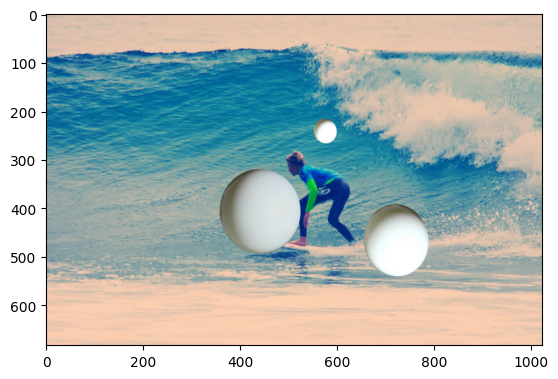

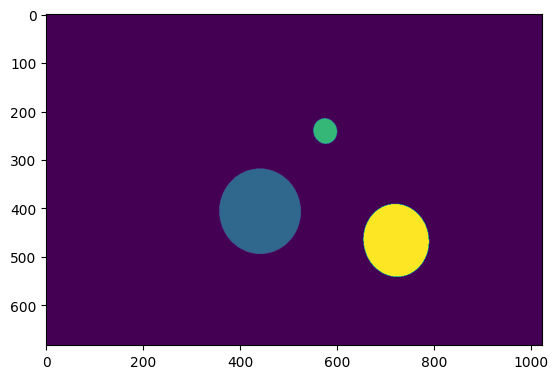

In [7]:
import matplotlib.pyplot as plt

for i, (image, mask) in enumerate(dataset):
    if i > 0:
        break

    image = transform(image)
    mask = transform(mask)

    plt.figure()
    plt.imshow(image)
    plt.figure()
    plt.imshow(mask)


In [7]:
Parallel(n_jobs=-1)(delayed(render)(i, image, mask) for i, (image, mask) in enumerate(dataset))


KeyboardInterrupt: 